<a href="https://colab.research.google.com/github/SADIKA2/Fake-job-posting-detection-with-machine-learning/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')

In [ ]:
data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


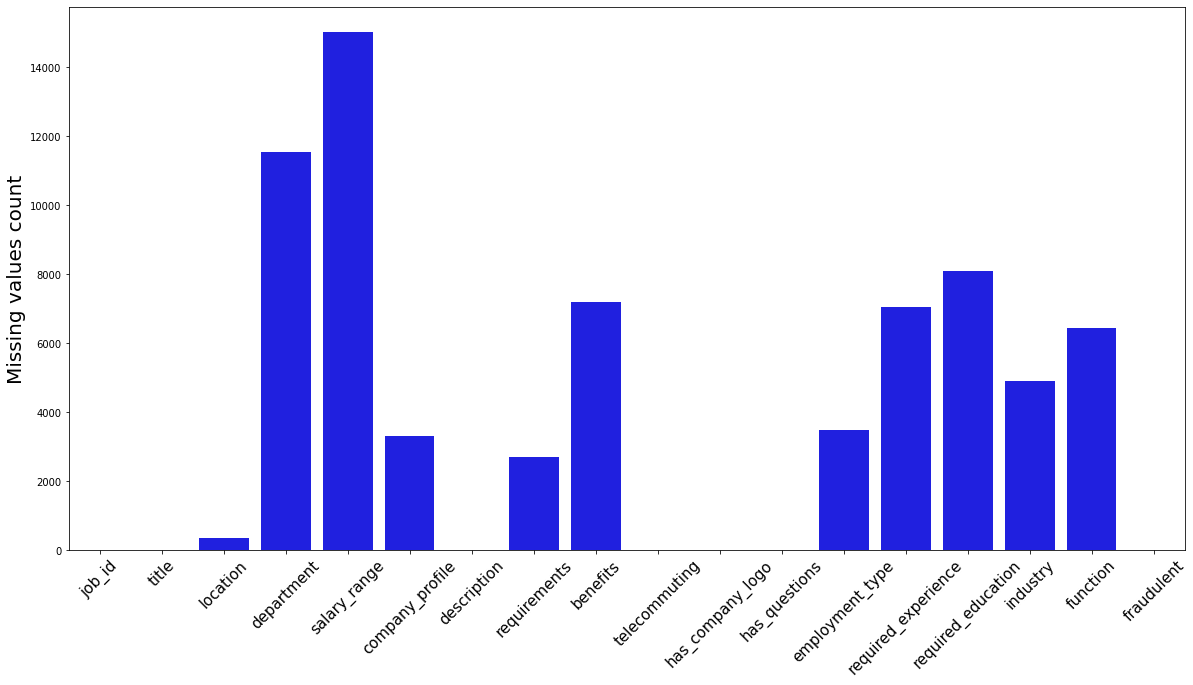

In [ ]:
#check null.
null_values = data.isnull().sum()
plt.figure(figsize = (20,10))
sns.barplot(null_values.index, null_values, color = 'blue')
# plt.suptitle('Missing values in the dataset', size = 20)
plt.ylabel('Missing values count', size = 20)
plt.xticks(rotation = '45', fontsize=15)
plt.show()

In [ ]:
#Check unique values
categorical_columns = []
for col in data.columns:
    print(f'Unique observations in {col}:', data[col].nunique())
    if data[col].nunique() < 14:
        categorical_columns.append(col)
print('Categorical columns:',categorical_columns)

Unique observations in job_id: 17880
Unique observations in title: 11231
Unique observations in location: 3105
Unique observations in department: 1337
Unique observations in salary_range: 874
Unique observations in company_profile: 1709
Unique observations in description: 14801
Unique observations in requirements: 11968
Unique observations in benefits: 6205
Unique observations in telecommuting: 2
Unique observations in has_company_logo: 2
Unique observations in has_questions: 2
Unique observations in employment_type: 5
Unique observations in required_experience: 7
Unique observations in required_education: 13
Unique observations in industry: 131
Unique observations in function: 37
Unique observations in fraudulent: 2
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


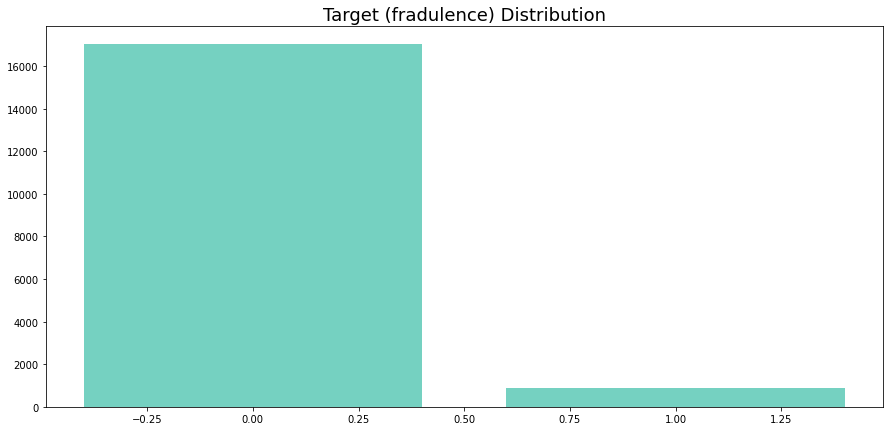

In [ ]:
#Check target value
figure = plt.figure(figsize = (15,7))
target_dist = data['fraudulent'].value_counts()
plt.bar(target_dist.index, target_dist, color=(0.1, 0.7, 0.6, 0.6))
plt.title('Target (fradulence) Distribution', size = 18)
plt.show()

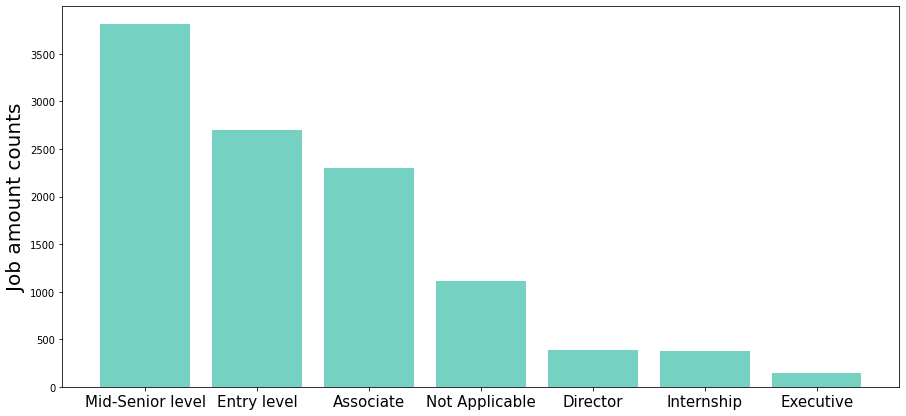

In [ ]:
#Check required experience and related job posts amounts
experience = dict(data.required_experience.value_counts())
figure = plt.figure(figsize = (15,7))
plt.bar(experience.keys(), experience.values(),color=(0.1, 0.7, 0.6, 0.6))
# plt.title('Number of job postings in different required experience', size=20)
# plt.xlabel('Previous experience', size=10)
plt.ylabel('Job amount counts', size=20)
plt.xticks(size=15)
plt.show()

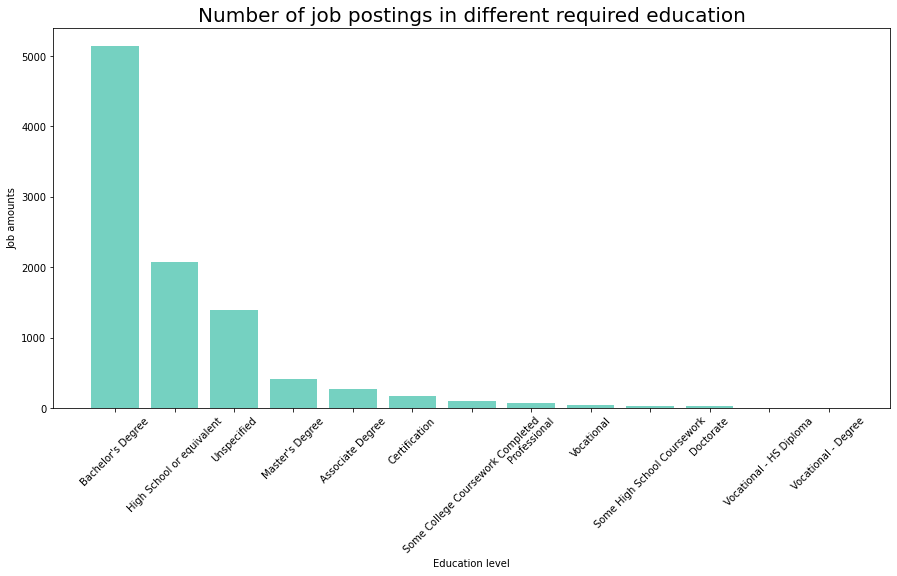

In [ ]:
#Check required education and related job posts amounts
experience = dict(data.required_education.value_counts())
figure = plt.figure(figsize = (15,7))
plt.bar(experience.keys(), experience.values(),color=(0.1, 0.7, 0.6, 0.6))
plt.title('Number of job postings in different required education', size=20)
plt.xlabel('Education level', size=10)
plt.ylabel('Job amounts', size=10)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#fill NA values with empty strings
data.location.fillna(' ', inplace=True)

Text(0, 0.5, 'Job amounts')

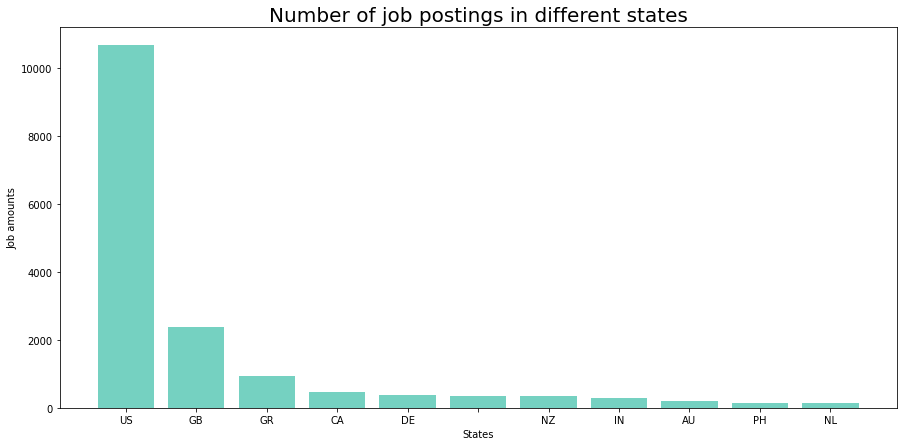

In [ ]:
#check job post in different states

#helper function to split the string and locate the state values
def split(location):
    l = location.split(',')
    return l[0]

state = dict(data.location.apply(split).value_counts()[:11])
plt.figure(figsize=(15,7))
plt.title('Number of job postings in different states', size=20)
plt.bar(state.keys(), state.values(), color=(0.1, 0.7, 0.6, 0.6))
plt.xlabel('States', size=10)
plt.ylabel('Job amounts', size=10)

In [ ]:
data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']

data.text.fillna(' ', inplace=True)

fraudjobs_text = data[data.fraudulent==0].text

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")

from wordcloud import WordCloud
from imblearn.combine import SMOTETomek
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


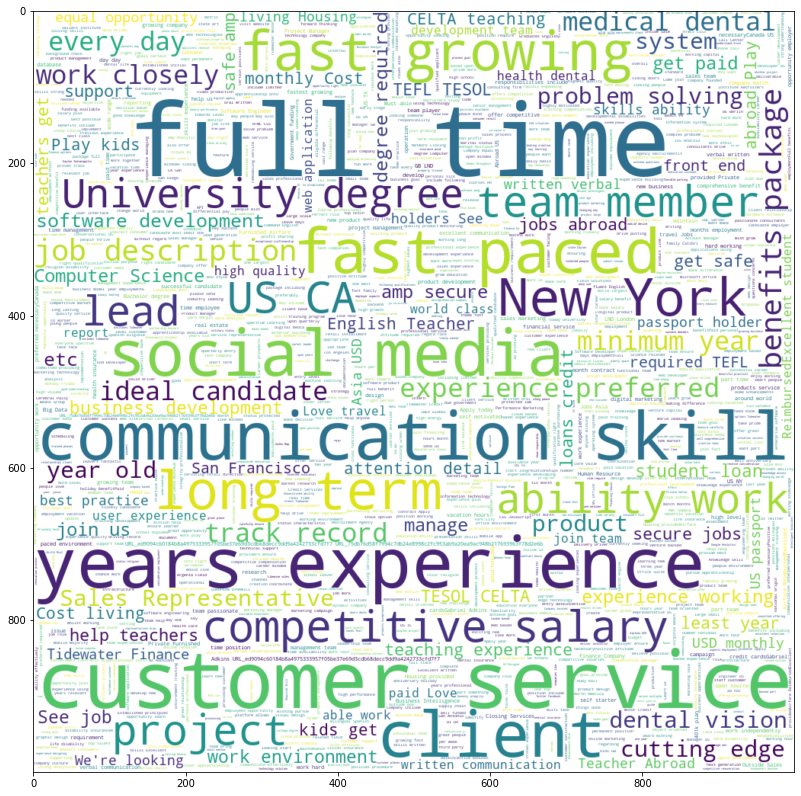

In [ ]:
plt.figure(figsize = (16,14))
wc = WordCloud(background_color='white', min_font_size = 3,  max_words = 3000 , width = 1000 , height = 1000 , stopwords = stop_words).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [ ]:
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']

#drop unrelated features
data = data.drop(labels=columns,axis=1)

data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0,
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0,
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DC US, DC, Wash..."
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [ ]:
#fill Nah
data.fillna(' ', inplace=True)

In [ ]:
#merge the title, location, profile, description, requirements into a mega text column

data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']

df = data[['text','fraudulent']]

In [ ]:
#downsampling the non-fraudulent to 1000

df1 = df[df['fraudulent']==0]
df1 = df1.sample(2000)

df2 = df[df['fraudulent']==1]

df_balanced = pd.concat([df1,df2],axis=0)

df_balanced = df_balanced.sample(frac=1) #shuffle all rows

In [ ]:
import string
from spacy.lang.en import English
from sklearn.base import TransformerMixin
import joblib

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from imblearn.combine import SMOTETomek
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy.lang.en.examples import sentences 

In [ ]:
# spacy tokenizer
punctuations = string.punctuation

# Create  list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()

def spacy_tokenizer(sentence):

    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens

# Custom cleanning class
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

def clean_text(text):
 return text.strip().lower()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# creating bag of words
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,2))
bow_vector

CountVectorizer(ngram_range=(1, 2),
                tokenizer=<function spacy_tokenizer at 0x7f8c32adadd0>)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced.text, df_balanced.fraudulent, test_size=0.2)

In [ ]:
X_train

12386    Lead Technical Architect IN, KL, Trivandrum So...
5697     Construction Engineer US, TX, Houston   Why Ch...
14344    Senior Interaction Designer GB, LND, London 10...
13801    Controls Engineer US, CA, Los Angeles We Provi...
15302    English Teacher Abroad  US, TX, Laredo We help...
                               ...                        
8949     Production Engineer US, TX, Houston Aker Solut...
13116    Operations Manager GB, ,  HGS is a world leade...
1179     Maintenance Mechanic US, NY, Niagara Falls Nia...
11550    SEO Analysis US, CA, San Mateo Aptitude Staffi...
6117     Web Designer HU, BU,    We’re looking for a we...
Name: text, Length: 2292, dtype: object

In [ ]:
X_test

2791     VP Business Development SG, ,  We’re not docto...
3230     Info Tech Personnel US, OH, Cincinnati Bradley...
17062    IT Project Manager - Austin US, TX, Austin KCS...
15414    PHP Developer GB, LND, Shoreditch Work at dxwd...
11745    General Labor - Part Time  US, CA, Modesto Wit...
                               ...                        
15958    Graduate Software Developer NZ, S, Christchurc...
12548    Human Resources Manager US, MI, Detroit We Pro...
17597    FRONT OFFICE MANAGER US, OH, COLUMBUS   We are...
9878     IC&E Technician US, , Stocton, CA DTE Energy a...
13177    Backend Engineer GB, LND, London #URL_8417994c...
Name: text, Length: 574, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight = 'balanced')

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f8c333357d0>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7f8c32adadd0>)),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced'))])

In [ ]:
y_pred = pipe.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       396
           1       0.79      0.87      0.82       178

    accuracy                           0.89       574
   macro avg       0.86      0.88      0.87       574
weighted avg       0.89      0.89      0.89       574



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight = 'balanced')

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f8c1620fc90>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7f8c32adadd0>)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [ ]:
y_pred = pipe.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       396
           1       0.89      0.84      0.87       178

    accuracy                           0.92       574
   macro avg       0.91      0.90      0.90       574
weighted avg       0.92      0.92      0.92       574



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


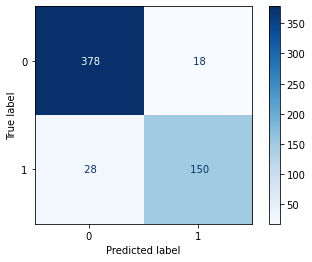

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix 
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier(class_weight = 'balanced')

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f8c15e39510>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7f8c32adadd0>)),
                ('classifier', XGBClassifier(class_weight='balanced'))])

In [ ]:
predicted = pipe.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, predicted))
print("XGBoost Recall:", recall_score(y_test, predicted))

XGBoost Accuracy: 0.9163763066202091
XGBoost Recall: 0.8202247191011236


In [ ]:
y_pred = pipe.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       396
           1       0.90      0.82      0.86       178

    accuracy                           0.92       574
   macro avg       0.91      0.89      0.90       574
weighted avg       0.92      0.92      0.92       574



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


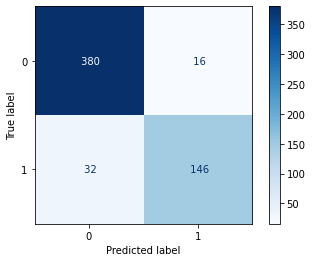

In [ ]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

In [ ]:
y_scores = pipe.predict_proba(X_test)[:, 1]

In [ ]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.9730734309385994


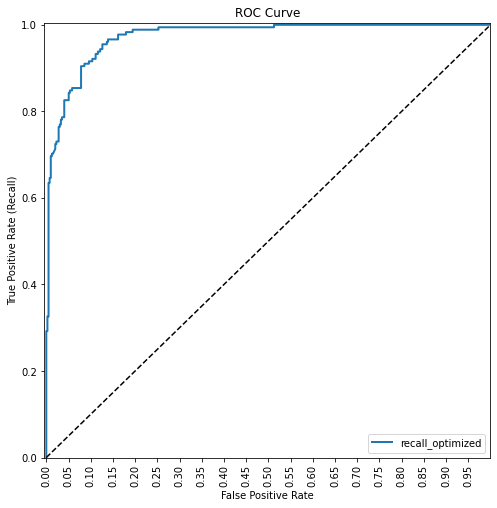

In [ ]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [ ]:
youden = list(tpr - fpr)

youden.index(max(youden)) #the maximum youden value's index is 58

72

In [ ]:
print(auc_thresholds[58], 'is our optimized auc threshold \n', 
      tpr[58], 'is the recall score (TP) at there \n',
      fpr[58], 'is the false positive rate at there') 

0.38472474 is our optimized auc threshold 
 0.9044943820224719 is the recall score (TP) at there 
 0.07828282828282829 is the false positive rate at there
